In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

warnings.filterwarnings('ignore')

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1/255.0, # Scaling or normalisation.
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [4]:
training_set = train_datagen.flow_from_directory('../b. Datasets/Flower Images/Training', 
                                                 target_size=(128, 128), 
                                                 batch_size=128,
                                                 class_mode='categorical')

Found 2736 images belonging to 5 classes.


In [5]:
test_set = test_datagen.flow_from_directory('../b. Datasets/Flower Images/Testing', 
                                            target_size=(128, 128), 
                                            batch_size=128,
                                            class_mode='categorical')

Found 934 images belonging to 5 classes.


In [6]:
model = Sequential()

# Flatten the input image (128x128x3) into a 1D vector
model.add(Flatten(input_shape=(128, 128, 3)))

# First Dense layer
model.add(Dense(512, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second Dense layer
model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third Dense layer
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=5, activation='softmax'))

In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,334,789 (96.64 MB)

 Trainable params: 25,332,997 (96.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [9]:
history = model.fit(training_set, 
                    epochs=5, 
                    validation_data = test_set, 
                    verbose=1)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.2543 - loss: 17.4798 - val_accuracy: 0.1927 - val_loss: 16.9698
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3285 - loss: 12.4680 - val_accuracy: 0.2966 - val_loss: 8.4330
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3720 - loss: 7.6951 - val_accuracy: 0.3298 - val_loss: 6.4009
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 770ms/step - accuracy: 0.3618 - loss: 6.2295 - val_accuracy: 0.2859 - val_loss: 5.7419
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 782ms/step - accuracy: 0.3697 - loss: 5.4665 - val_accuracy: 0.3158 - val_loss: 5.3293


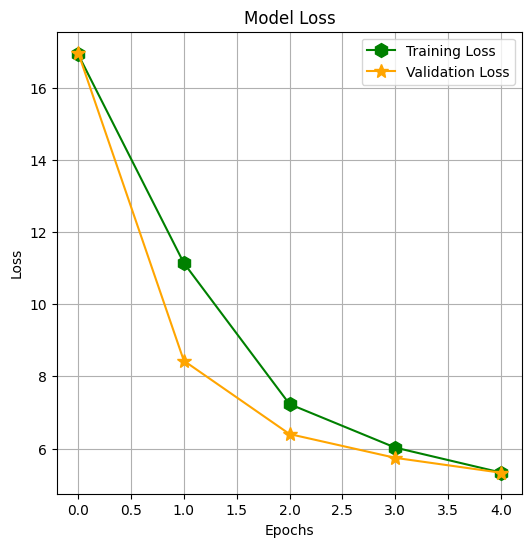

In [10]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'], 
         label='Training Loss', 
         color='green', 
         marker='h', 
         markersize=10)
plt.plot(history.history['val_loss'], 
         label='Validation Loss', 
         color='orange', 
         marker='*', 
         markersize=10)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

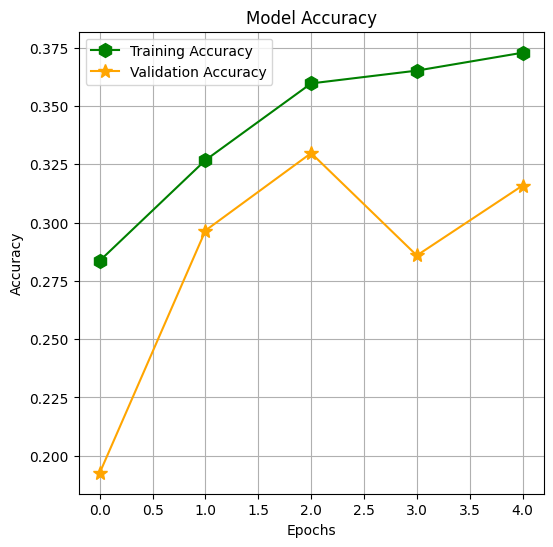

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], 
         label='Training Accuracy', 
         color='green', 
         marker='h', 
         markersize=10)
plt.plot(history.history['val_accuracy'], 
         label='Validation Accuracy', 
         color='orange', 
         marker='*', 
         markersize=10)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
test_preds = model.predict(test_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step


In [13]:
test_pred_class = np.argmax(test_preds, axis=1)

In [14]:
test_loss, test_acccuracy = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acccuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.3094 - loss: 5.3143
Test Loss: 5.329338550567627
Test Accuracy: 0.3158458173274994


In [15]:
submission_df = pd.DataFrame({
    'FileName': test_set.filenames,
    'Class': test_pred_class
}).sort_values(by='FileName', ascending=True)

In [16]:
display(submission_df.head(2))
display(submission_df.tail(2))

,FileName,Class
0,daisy\10140303196_b88d3d6cec.jpg,1
1,daisy\10172379554_b296050f82_n.jpg,2


,FileName,Class
932,tulips\19413898445_69344f9956_n.jpg,1
933,tulips\19425920580_cdc8f49aed_n.jpg,2


In [17]:
submission_df.to_csv('../c. Output Files/Flowers Dataset - Image Classification - Prediction.csv', index=False)